# Mines Nancy - Fall 2024 - Numerical Optimization 
----
## TP3: solving constrained optimization algorithms with CVXPY

This is a complement to session 8. It implements several examples seen in class. 


Practical implementation of the algorithms relies on  Python libraries:
1. **NumPy**: For efficient numerical computations, matrix operations, and solving least-squares problems using built-in linear algebra functions.
2. **Matplotlib**: For visualizing the data and displaying / interpreting results.
3. **Scipy**: a NumPy-based python library for scientific computations. 
4. **cvxpy**: DCP programming in Python. 

### Running the Notebook
This notebook can be executed in the following environments:
- **Google Colab**: A convenient, cloud-based option that requires no setup. Simply open the notebook in Colab, and you're ready to run the code.
- **Locally**: You can run the notebook on your local machine using environments like **JupyterLab** or **Jupyter Notebook**. You can also run it directly in **Visual Studio Code** if you have the Jupyter extension. In all cases, ensure you have Python installed along with the required libraries, `NumPy` and `Matplotlib`, ``scipy`` and ``cvxpy``. 

## Using CVXPY

Remember to check the documentation here: https://www.cvxpy.org/. We'll use CVXPy to solve the following optimization problem:
$$ \begin{split}
\operatorname{minimize}&\quad (x_1-2)^2+(x_2-1)^2\\
  \text{subject to}&\quad x_1^2 - x_2 \leq 0\\
  &\quad x_1+x_2\leq 2 
  \end{split}
  $$

In [36]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

In [37]:
# construct the problem 
# variables
x1 = cvx.Variable()
x2 = cvx.Variable()

# constraints 
constraint_1 = [x1**2 -x2 <= 0]
constraint_2 = [x1+x2 <= 2]
constraints = constraint_1 + constraint_2

# objective 
obj = cvx.Minimize((x1-2)**2 + (x2-1)**2)

# define problem 
prob = cvx.Problem(obj, constraints)

In [38]:
# solve problem 

# there are many options; see docs for reference. 
# solver = cvx.SCS; use a specific solver; if not precised, cvxpy will call the best solver available for the given problem;
# verbose = True; activates display of what's happening behind the instruction. 
# eps=1e-10: fixes the tolerance for deciding convergence. 
# max_iters=1000; fixes the maximal number of iterations
#


prob.solve(solver=cvx.SCS, verbose=True, eps=1e-10, max_iters=1000) 

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) Dec 09 03:51:51 PM: Your problem has 2 variables, 2 constraints, and 0 parameters.
(CVXPY) Dec 09 03:51:51 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 09 03:51:51 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 09 03:51:51 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Dec 09 03:51:51 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 09 03:51:51 PM: Compiling problem (target solver=SCS).
(CVXPY

np.float64(0.9999999999999996)

In [39]:
# we can access several indicators trough attributes of prob instance

print(prob.solver_stats)

SolverStats(solver_name='SCS', solve_time=0.00041675, setup_time=0.00027225, num_iters=150, extra_stats={'x': array([-1.0000000e+00, -1.3035478e-15,  1.0000000e+00,  1.0000000e+00,
        1.0000000e+00]), 'y': array([-2.00000000e+00, -2.61221152e-15,  6.66666667e-01,  6.66666667e-01,
        6.66666667e-01,  2.24390407e-16, -6.66666667e-01]), 's': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.00000000e+00, -6.73171222e-16,  2.00000000e+00]), 'info': {'status_val': 1, 'iter': 150, 'scale_updates': 1, 'scale': 0.8720805388040477, 'pobj': 0.999999999999998, 'dobj': 0.9999999999999989, 'res_pri': 1.160690296847597e-15, 'res_dual': 3.084935444956264e-16, 'gap': 9.420554557498517e-16, 'res_infeas': 1.0000000000000007, 'res_unbdd_a': nan, 'res_unbdd_p': nan, 'comp_slack': 0.0, 'solve_time': 0.41675, 'setup_time': 0.27225, 'lin_sys_time': 0.019941000000000004, 'cone_time': 0.005310999999999999, 'accel_time': 0.0021899999999999997, 'rejected_accel_steps':

In [40]:
print("Number of iterations:", prob.solver_stats.num_iters)
print("Optimal value:", prob.solution.opt_val)
print("Optimal solution:", x1.value, x2.value)

Number of iterations: 150
Optimal value: 0.999999999999998
Optimal solution: 1.0000000000000002 0.9999999999999984


In [41]:
# can print also some solver specifics info  iterates
print(prob.solver_stats.extra_stats)

{'x': array([-1.0000000e+00, -1.3035478e-15,  1.0000000e+00,  1.0000000e+00,
        1.0000000e+00]), 'y': array([-2.00000000e+00, -2.61221152e-15,  6.66666667e-01,  6.66666667e-01,
        6.66666667e-01,  2.24390407e-16, -6.66666667e-01]), 's': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.00000000e+00, -6.73171222e-16,  2.00000000e+00]), 'info': {'status_val': 1, 'iter': 150, 'scale_updates': 1, 'scale': 0.8720805388040477, 'pobj': 0.999999999999998, 'dobj': 0.9999999999999989, 'res_pri': 1.160690296847597e-15, 'res_dual': 3.084935444956264e-16, 'gap': 9.420554557498517e-16, 'res_infeas': 1.0000000000000007, 'res_unbdd_a': nan, 'res_unbdd_p': nan, 'comp_slack': 0.0, 'solve_time': 0.41675, 'setup_time': 0.27225, 'lin_sys_time': 0.019941000000000004, 'cone_time': 0.005310999999999999, 'accel_time': 0.0021899999999999997, 'rejected_accel_steps': 0, 'accepted_accel_steps': 0, 'status': 'solved'}}


### Another example with CVXPy, large scale non-negative least squares

$$ \begin{split}
\operatorname{minimize}&\quad \Vert Ax - b\Vert_2^2\\
  \text{subject to}&\quad x \geq 0
  \end{split}
  $$
where $A\in \mathbb{R}^{1000 \times 500}$

In [42]:
np.random.seed(1023)
M, N = 1000, 500

A = np.random.randn(M, N)
b = np.random.randn(M)

# define variable 
x = cvx.Variable(N)

# constraint
constraints = [x >= 0]

# obj 
obj = cvx.Minimize(cvx.norm2(A @x- b)**2)

# problem definition

prob = cvx.Problem(obj, constraints)


In [43]:
prob.solve(verbose=True) #solve problem

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) Dec 09 03:51:56 PM: Your problem has 500 variables, 500 constraints, and 0 parameters.
(CVXPY) Dec 09 03:51:56 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 09 03:51:56 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Dec 09 03:51:56 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Dec 09 03:51:56 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 09 03:51:56 PM: Compiling problem (target solver=CLARABEL

688.8007521659797

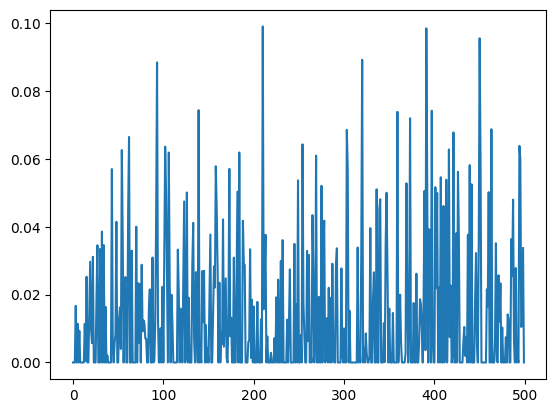

In [44]:
# display solution 
plt.plot(x.value)